## Imports

In [1]:
import urllib.request, json
import pandas as pd
import geopandas
import folium
import matplotlib.pyplot as plt
import pickle
import math
import datetime
import collections
from tqdm import tqdm

### Import Query results

These are the resuts of two queries.
1. A simple query of all site information
2. The quality of each site in our range

In [10]:
with open('sites.pickle', 'rb') as f:
    sites = pickle.load(f)
    
with open('quality_responces.pickle', 'rb') as f:
    quality_responces = pickle.load(f)
    
# Put these into a dataframe
# Specify the area we are looking at
max_lat = 52.50
max_long = -1.67
min_lat = 52.42
min_long = -1.75

sites_df = pd.DataFrame(data = sites)
area_sites_df = sites_df.loc[(min_long < sites_df.Longitude) & (sites_df.Longitude < max_long)
                            & (min_lat < sites_df.Latitude) & (sites_df.Latitude < max_lat)]


quality_responces_df  = pd.DataFrame(data = quality_responces)
good_quality_responces_df = quality_responces_df.loc[quality_responces_df.data_quality >= 40]

# Filter our sites dataframe onto this set of sites
good_quality_sites = area_sites_df.loc[area_sites_df.Id.isin(good_quality_responces_df.sites) ]

good_quality_sites = good_quality_sites.reset_index(drop=True)
good_quality_sites

,Id,Name,Description,Longitude,Latitude,Status
0,175,MIDAS site at M42/6482L priority 1 on link 126...,M42/6482L,-1.716752,52.497242,Active
1,561,MIDAS site at M42/6473B priority 1 on link 199...,M42/6473B,-1.713067,52.490841,Active
2,1102,MIDAS site at M42/6468A priority 1 on link 126...,M42/6468A,-1.711725,52.484392,Active
3,1608,MIDAS site at M6/5711L priority 1 on link 1110...,M6/5711L,-1.715598,52.479798,Active
4,1747,MIDAS site at M6/5732B priority 1 on link 1990...,M6/5732B,-1.734829,52.494379,Active
5,1926,MIDAS site at M42/6472A priority 1 on link 126...,M42/6472A,-1.714189,52.488263,Active
6,2017,MIDAS site at M6/5730A priority 1 on link 1990...,M6/5730A,-1.733881,52.492723,Active
7,2253,MIDAS site at M600/1134A priority 1 on link 12...,M600/1134A,-1.716796,52.494985,Active
8,2330,MIDAS site at M6/5722A priority 1 on link 1990...,M6/5722A,-1.727512,52.486631,Active
9,2951,MIDAS site at M42/6467K priority 1 on link 199...,M42/6467K,-1.714836,52.483833,Active


### Get the Reports

In [22]:
def daily_report_query_url(site_id, page_num, start_date = '15062021', end_date = '15062022'):
    query_url = f"https://webtris.highwaysengland.co.uk/api/v1/reports/Daily?sites={site_id}&start_date={start_date}&end_date={end_date}&page={page_num}&page_size=10000"
    return query_url


def get_site_report(site_id, start_date='15062021', end_date='15062022'):
    
    # Download page 1
    report_url = daily_report_query_url(site_id, 1, start_date, end_date)
    with urllib.request.urlopen(report_url) as url:
        report_page = json.loads(url.read().decode())
        
    
    # Work out how many pages are required    
    header = report_page['Header']
    rows = report_page['Rows']
    row_count = header['row_count']
    total_pages = math.ceil(row_count / 10000)
    
    # Make a dataframe of the rows so dar
    report_df = pd.DataFrame(data = rows)
    
    for i in range(2, total_pages+1):
        # Get page i of the report
        report_url = daily_report_query_url(site_id, i, start_date, end_date)
        with urllib.request.urlopen(report_url) as url:
            report_page = json.loads(url.read().decode())
        
        rows = report_page['Rows']
        current_page_df = pd.DataFrame(data = rows)
        report_df = pd.concat([report_df, current_page_df], ignore_index=True)

    return report_df, header

In [50]:
reports = collections.defaultdict(str)

for site_id in tqdm(good_quality_sites.Id):
    report, header = get_site_report(site_id, start_date='01062021', end_date = '15062022')
    report['site_id'] = site_id
    reports[site_id] = report

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [03:27<00:00,  4.23s/it]


In [56]:
# Combine reports into one df
report_df = pd.concat(list(reports.values()), ignore_index=True)
# Save this df
report_df.to_feather('all_reports.feather')

### Data Cleaning

In [2]:
# Import df
report_df = pd.read_feather('all_reports.feather')

In [3]:
clean_col_names = ['site_name',
     'report_date',
     'time_period_ending',
     'time_interval',
     '0-520cm',
     '521-660cm',
     '661-1160cm',
     '1160+cm',
     '0-10mph',
     '11-15mph',
     '16-20mph',
     '21-25mph',
     '26-30mph',
     '31-35mph',
     '36-40mph',
     '41-45mph',
     '46-50mph',
     '51-55mph',
     '56-60mph',
     '61-70mph',
     '71-80mph',
     '80+mph',
     'avg_mph',
     'total_volume',
     'site_id']

In [4]:
report_df.columns = clean_col_names
report_df

,site_name,report_date,time_period_ending,time_interval,0-520cm,521-660cm,661-1160cm,1160+cm,0-10mph,11-15mph,...,41-45mph,46-50mph,51-55mph,56-60mph,61-70mph,71-80mph,80+mph,avg_mph,total_volume,site_id
0,M42/6482L,2021-06-01T00:00:00,00:14:00,0,39,4,3,7,,,...,,,,,,,,61,53,175
1,M42/6482L,2021-06-01T00:00:00,00:29:00,1,37,8,2,9,,,...,,,,,,,,65,56,175
2,M42/6482L,2021-06-01T00:00:00,00:44:00,2,21,9,1,2,,,...,,,,,,,,69,33,175
3,M42/6482L,2021-06-01T00:00:00,00:59:00,3,25,4,2,6,,,...,,,,,,,,66,37,175
4,M42/6482L,2021-06-01T00:00:00,01:14:00,4,23,8,3,4,,,...,,,,,,,,66,38,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783195,M6/5701B,2022-06-15T00:00:00,22:59:59,91,,,,,,,...,,,,,,,,,,18230
1783196,M6/5701B,2022-06-15T00:00:00,23:14:59,92,,,,,,,...,,,,,,,,,,18230
1783197,M6/5701B,2022-06-15T00:00:00,23:29:59,93,,,,,,,...,,,,,,,,,,18230
1783198,M6/5701B,2022-06-15T00:00:00,23:44:59,94,,,,,,,...,,,,,,,,,,18230


In [5]:
tidy_report = report_df[[
     'site_name',
     'site_id',
     'report_date',
     'time_period_ending',
     'time_interval',
     '0-520cm',
     '521-660cm',
     '661-1160cm',
     '1160+cm',
     'avg_mph',
     'total_volume']]
tidy_report

,site_name,site_id,report_date,time_period_ending,time_interval,0-520cm,521-660cm,661-1160cm,1160+cm,avg_mph,total_volume
0,M42/6482L,175,2021-06-01T00:00:00,00:14:00,0,39,4,3,7,61,53
1,M42/6482L,175,2021-06-01T00:00:00,00:29:00,1,37,8,2,9,65,56
2,M42/6482L,175,2021-06-01T00:00:00,00:44:00,2,21,9,1,2,69,33
3,M42/6482L,175,2021-06-01T00:00:00,00:59:00,3,25,4,2,6,66,37
4,M42/6482L,175,2021-06-01T00:00:00,01:14:00,4,23,8,3,4,66,38
...,...,...,...,...,...,...,...,...,...,...,...
1783195,M6/5701B,18230,2022-06-15T00:00:00,22:59:59,91,,,,,,
1783196,M6/5701B,18230,2022-06-15T00:00:00,23:14:59,92,,,,,,
1783197,M6/5701B,18230,2022-06-15T00:00:00,23:29:59,93,,,,,,
1783198,M6/5701B,18230,2022-06-15T00:00:00,23:44:59,94,,,,,,


In [6]:
interger_cols = [
     '0-520cm',
     '521-660cm',
     '661-1160cm',
     '1160+cm',
     'total_volume']

In [7]:
tidy_report = tidy_report.loc[tidy_report['total_volume'] != '']
tidy_report.loc[:,interger_cols] = tidy_report[interger_cols].astype('int32')

/tmp/ipykernel_2585139/3780097625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tidy_report.loc[:,interger_cols] = tidy_report[interger_cols].astype('int32')


In [8]:
def get_timestamp(row):
    year, month,day = row['report_date'].split('T')[0].split('-')
    hour, minute, second = row['time_period_ending'].split(':')
    
    return datetime.datetime(int(year),int(month),int(day), int(hour), int(minute))

In [9]:
tidy_report.loc[:,'timestamp'] = tidy_report.apply(get_timestamp,axis=1)
tidy_report.loc[:,'hour'] = tidy_report.timestamp.dt.hour.astype(str)
tidy_report.loc[:,'DOW'] =  tidy_report.timestamp.dt.day_of_week.astype(str)
tidy_report.loc[:,'month'] = tidy_report.timestamp.dt.month.astype(str)

/tmp/ipykernel_2585139/2588312128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tidy_report.loc[:,'timestamp'] = tidy_report.apply(get_timestamp,axis=1)
/tmp/ipykernel_2585139/2588312128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tidy_report.loc[:,'hour'] = tidy_report.timestamp.dt.hour.astype(str)
/tmp/ipykernel_2585139/2588312128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

### Get Normalised counts

In [10]:
# Normalise by dividing each count by it's mean

# tidy_report.loc[:,'normal'] = tidy_report.groupby('site_id').total_volume.apply( lambda x: x/x.mean() )
# tidy_report[interger_cols].groupby('site_id').transform("mean")
# mean = tidy_report.groupby('site_id')['total_volume'].transform("mean")
# tidy_report.loc[:,'normal'] = tidy_report['total_volume'] / mean

for name in interger_cols:
    print(name)
    new_name = f"{name}_normalised"
    mean = tidy_report.groupby('site_id')[name].transform("mean")
    tidy_report.loc[:, new_name] = tidy_report[name] / mean

0-520cm


/tmp/ipykernel_2585139/3381475107.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tidy_report.loc[:, new_name] = tidy_report[name] / mean


521-660cm


/tmp/ipykernel_2585139/3381475107.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tidy_report.loc[:, new_name] = tidy_report[name] / mean


661-1160cm


/tmp/ipykernel_2585139/3381475107.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tidy_report.loc[:, new_name] = tidy_report[name] / mean


1160+cm


/tmp/ipykernel_2585139/3381475107.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tidy_report.loc[:, new_name] = tidy_report[name] / mean


total_volume


/tmp/ipykernel_2585139/3381475107.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tidy_report.loc[:, new_name] = tidy_report[name] / mean


In [11]:
tidy_report

,site_name,site_id,report_date,time_period_ending,time_interval,0-520cm,521-660cm,661-1160cm,1160+cm,avg_mph,total_volume,timestamp,hour,DOW,month,0-520cm_normalised,521-660cm_normalised,661-1160cm_normalised,1160+cm_normalised,total_volume_normalised
0,M42/6482L,175,2021-06-01T00:00:00,00:14:00,0,39,4,3,7,61,53,2021-06-01 00:14:00,0,1,6,0.317183,0.128501,0.210441,0.457163,0.288589
1,M42/6482L,175,2021-06-01T00:00:00,00:29:00,1,37,8,2,9,65,56,2021-06-01 00:29:00,0,1,6,0.300917,0.257003,0.140294,0.58778,0.304924
2,M42/6482L,175,2021-06-01T00:00:00,00:44:00,2,21,9,1,2,69,33,2021-06-01 00:44:00,0,1,6,0.170791,0.289128,0.070147,0.130618,0.179688
3,M42/6482L,175,2021-06-01T00:00:00,00:59:00,3,25,4,2,6,66,37,2021-06-01 00:59:00,0,1,6,0.203322,0.128501,0.140294,0.391854,0.201468
4,M42/6482L,175,2021-06-01T00:00:00,01:14:00,4,23,8,3,4,66,38,2021-06-01 01:14:00,1,1,6,0.187057,0.257003,0.210441,0.261236,0.206913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772040,M6/5701B,18230,2022-02-18T00:00:00,17:14:00,68,6,0,4,2,59,12,2022-02-18 17:14:00,17,4,2,0.020203,0.0,0.15575,0.03503,0.029889
1772041,M6/5701B,18230,2022-02-18T00:00:00,17:29:00,69,6,1,5,2,61,15,2022-02-18 17:29:00,17,4,2,0.020203,0.046025,0.194687,0.03503,0.037361
1772042,M6/5701B,18230,2022-02-18T00:00:00,17:44:00,70,9,0,5,0,61,14,2022-02-18 17:44:00,17,4,2,0.030304,0.0,0.194687,0.0,0.03487
1772043,M6/5701B,18230,2022-02-18T00:00:00,17:59:00,71,11,0,3,0,63,14,2022-02-18 17:59:00,17,4,2,0.037039,0.0,0.116812,0.0,0.03487


### Plot to check all is well

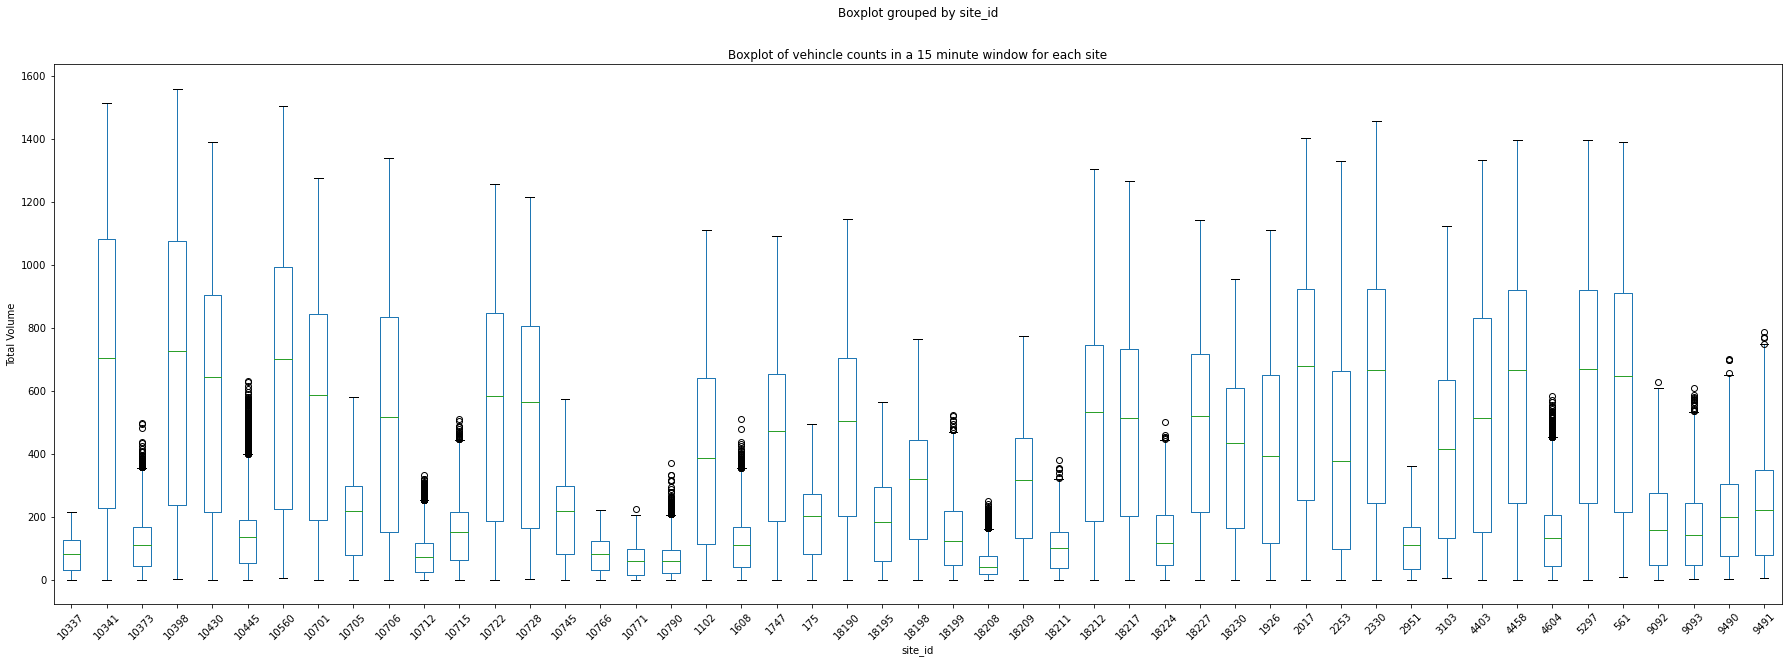

In [12]:
fig, ax = plt.subplots(figsize=(30,10))
tidy_report.boxplot(column='total_volume', by = 'site_id', ax=ax, grid=False, rot=45)
ax.set_title('Boxplot of vehincle counts in a 15 minute window for each site')
ax.set_ylabel('Total Volume')
plt.show()

In [ ]:
# Check Numbers are valid
tidy_report.loc[tidy_report.total_volume == 1558]
daily_report_query_url(10398, 1, start_date='17082021', end_date='17082021')

<AxesSubplot:xlabel='timestamp', ylabel='total_volume_normalised'>

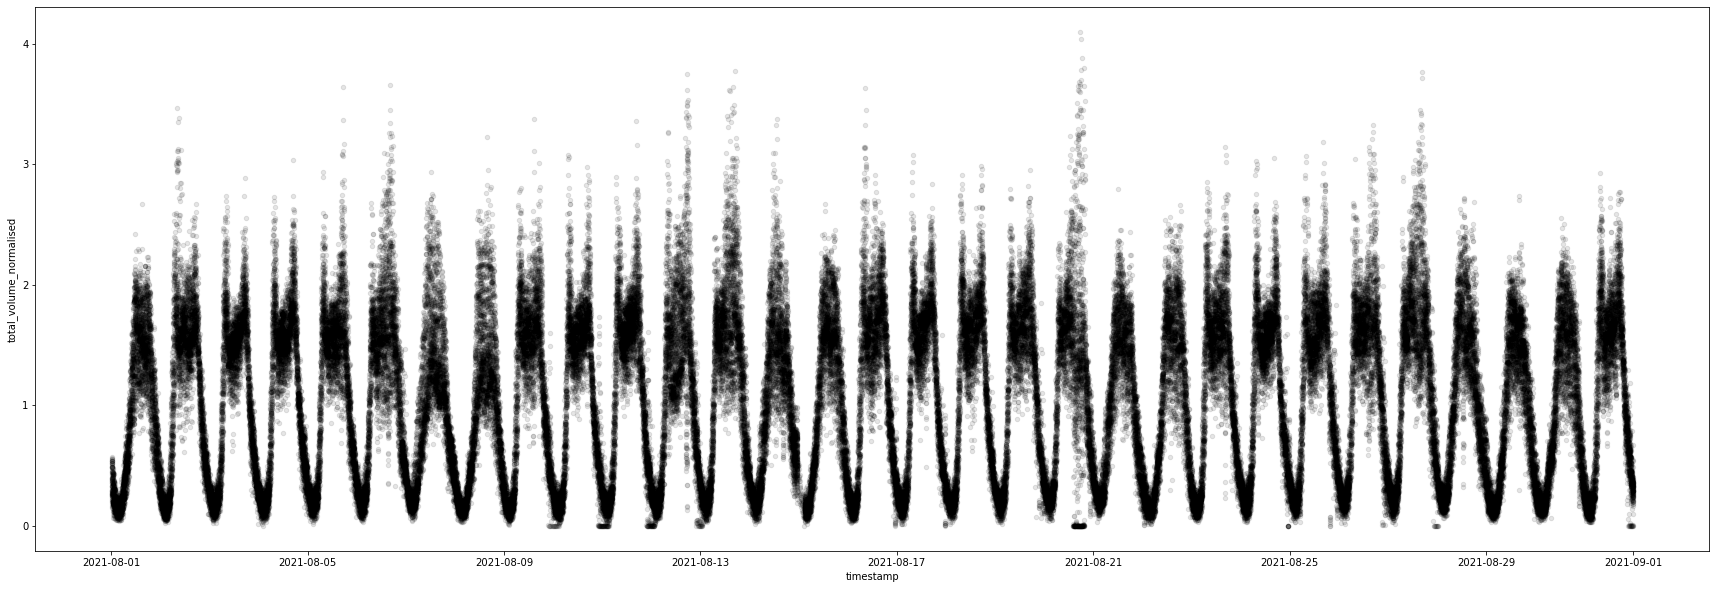

In [14]:
filterd_report = tidy_report.loc[tidy_report['timestamp'].dt.to_period('M')  == '2021-08']
filterd_report.plot('timestamp','total_volume_normalised', figsize = (30,10), kind = 'scatter', alpha=0.1, c='black')

<AxesSubplot:xlabel='timestamp', ylabel='0-520cm_normalised'>

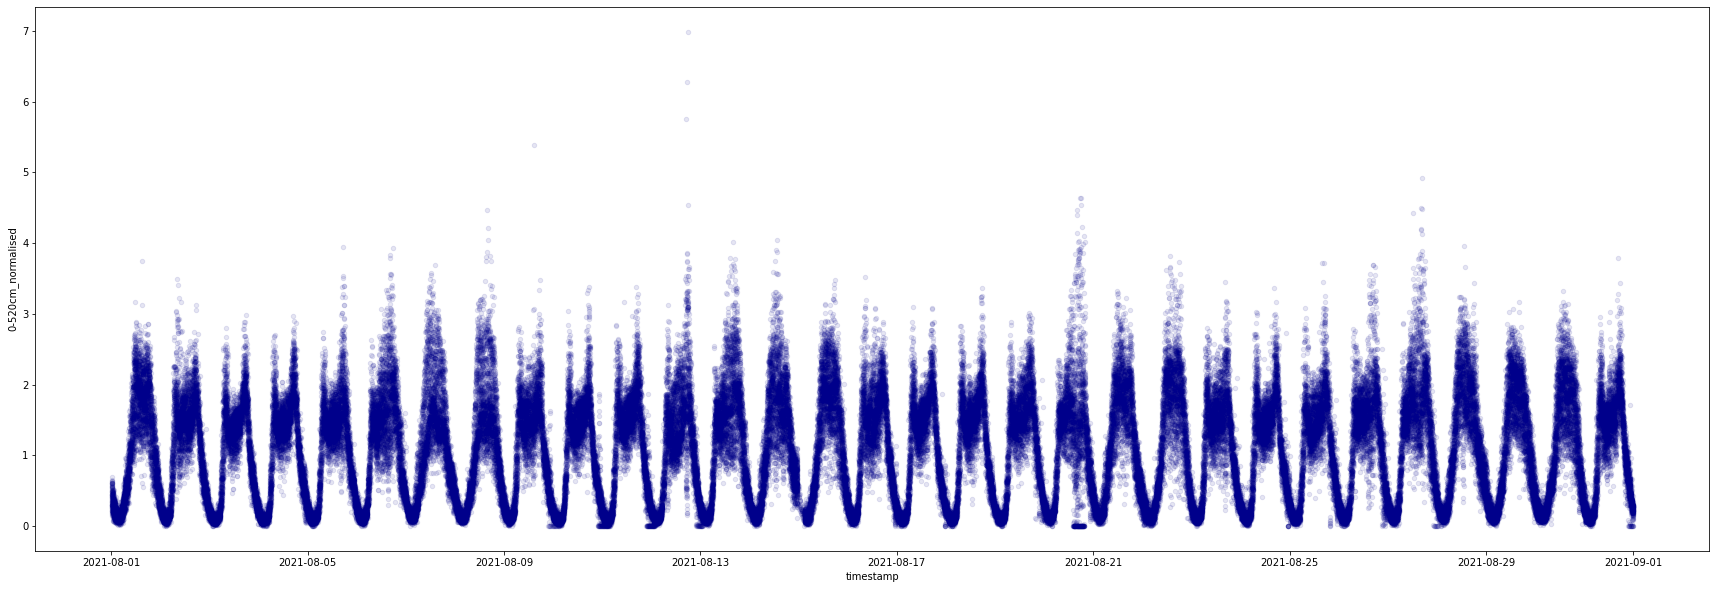

In [15]:
filterd_report = tidy_report.loc[tidy_report['timestamp'].dt.to_period('M')  == '2021-08']
filterd_report.plot('timestamp','0-520cm_normalised', figsize = (30,10), kind = 'scatter', alpha=0.1, c='darkblue')

### Export Report

In [23]:
tidy_report.reset_index(drop=True).to_feather('tidy_report.feather')